In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


plt.rcParams["font.family"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

In [18]:
data = pd.read_csv('./Titanic.csv')

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
data.Age.fillna(data.Age.mean(),inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [27]:
data.Sex[data.Sex == 'male'] = 0
data.Sex[data.Sex == 'female'] = 1

C:\Users\zky\AppData\Local\Temp\ipykernel_47808\208405894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sex[data.Sex == 'female'] = 1


In [30]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
data.Embarked[data.Embarked == 'S'] = 0
data.Embarked[data.Embarked == 'C'] = 1
data.Embarked[data.Embarked == 'Q'] = 2

data.Embarked = data.Embarked.fillna(3)


In [36]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [49]:
X = data.iloc[:,2:]
y = data.iloc[:,1]
y 

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print("权重：", lr.coef_)
print("偏置：", lr.intercept_)
print("真实值：", y_test)
print("预测值：", y_hat)


权重： [[-1.00845021e+00  2.56525781e+00 -3.93923665e-02 -3.37591003e-01
  -3.73420150e-02  1.66133206e-03  2.59883035e-01]]
偏置： [2.03967912]
真实值： 495    0
648    0
278    0
31     1
255    1
      ..
167    0
306    1
379    0
742    1
10     1
Name: Survived, Length: 223, dtype: int64
预测值： [0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
print(len(y_test),len(y_hat))

223 223


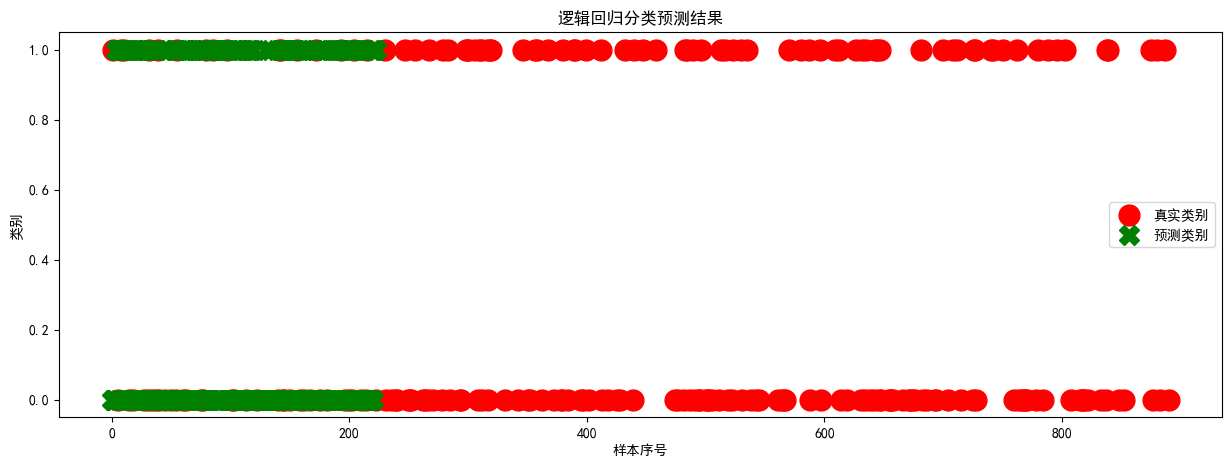

In [51]:
plt.figure(figsize=(15, 5))
plt.plot(y_test, marker="o", ls="", ms=15, c="r", label="真实类别")
plt.plot(y_hat, marker="X", ls="", ms=15, c="g", label="预测类别")
plt.legend()
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.title("逻辑回归分类预测结果")
plt.show()


前5个样本的预测概率：
[[0.86665335 0.13334665]
 [0.89501725 0.10498275]
 [0.88903993 0.11096007]
 [0.06963693 0.93036307]
 [0.34350013 0.65649987]]
使用概率预测结果：
[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1]


Text(0.5, 1.0, '逻辑回归分类概率')

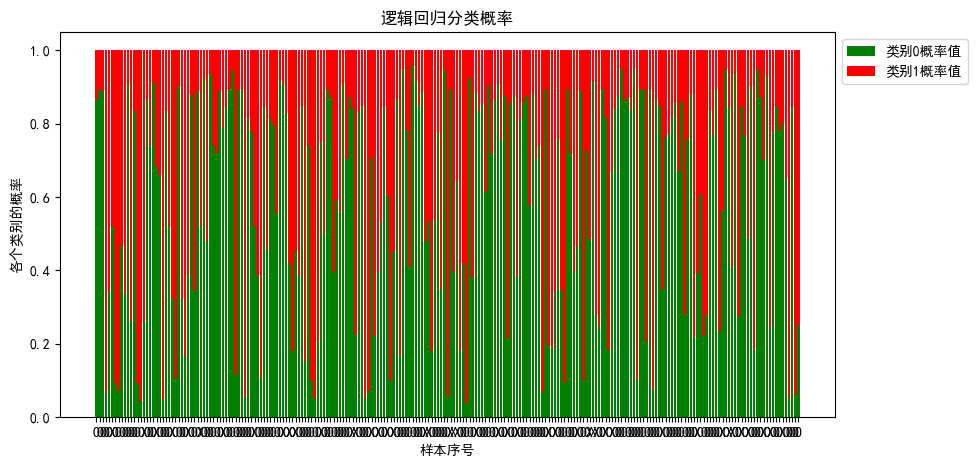

In [53]:
probability = lr.predict_proba(X_test)
print("前5个样本的预测概率：")
print(probability[:5])
# 获取每一行最大值的索引，就等价于预测结果。
print("使用概率预测结果：")
print(np.argmax(probability, axis=1))

# 产生序号，用于可视化的横坐标。

index = np.arange(len(X_test))

# 分别获取类别0与类别1的概率。

pro_0 = probability[:, 0]

pro_1 = probability[:, 1]

tick_label = np.where(y_test == y_hat, "O", "X")

plt.figure(figsize=(10, 5))

# 绘制堆叠图

plt.bar(index, height=pro_0, color="g", label="类别0概率值")

# bottom=x，表示从x的值开始堆叠上去。

# tick_label 设置标签刻度的文本内容。

plt.bar(index, height=pro_1, color='r', bottom=pro_0, label="类别1概率值",tick_label=tick_label)

plt.legend(loc="best", bbox_to_anchor=(1, 1))

plt.xlabel("样本序号")

plt.ylabel("各个类别的概率")

plt.title("逻辑回归分类概率")

In [55]:
count = 0
for i, j in zip(y_test,y_hat):
    if i == j:
        count += 1
print(len(y_test),count,count/len(y_test))

223 178 0.7982062780269058


In [ ]:
class MyLogiticRegression:
	def __init__(self,eta=0.01,):
		pass
		
	def fit(self, X, y):
		self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
		self.coef_ = self.w[1:]
		self.intercept_ = self.w[0]
		
	def predict(self, X):
		return X.dot(self.w)